In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns


In [2]:
os.getcwd()

'C:\\Users\\145723'

In [3]:
os.chdir("C:\\Users\\145723\\Desktop\\Great Learning- Statistcs")

In [4]:
os.getcwd()

'C:\\Users\\145723\\Desktop\\Great Learning- Statistcs'

In [5]:
ins=pd.read_csv("insurance.csv")

In [6]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## There are no null or missing values.

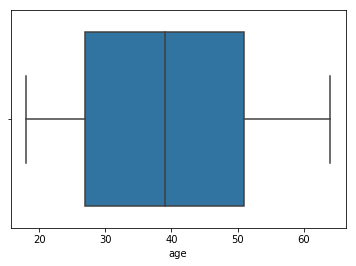

In [9]:
sns.boxplot('age',data=ins )

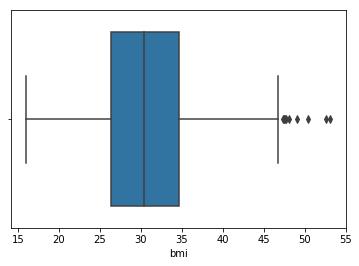

In [10]:
sns.boxplot('bmi',data=ins)

## Converting features in Categorical features

In [11]:

categorical_features= ['sex','smoker','region']

for _ in categorical_features:
    ins[_]=ins[_].astype('category')

In [12]:
ins.info() #Identifying missing values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3F24306A0>,
      dtype=object)

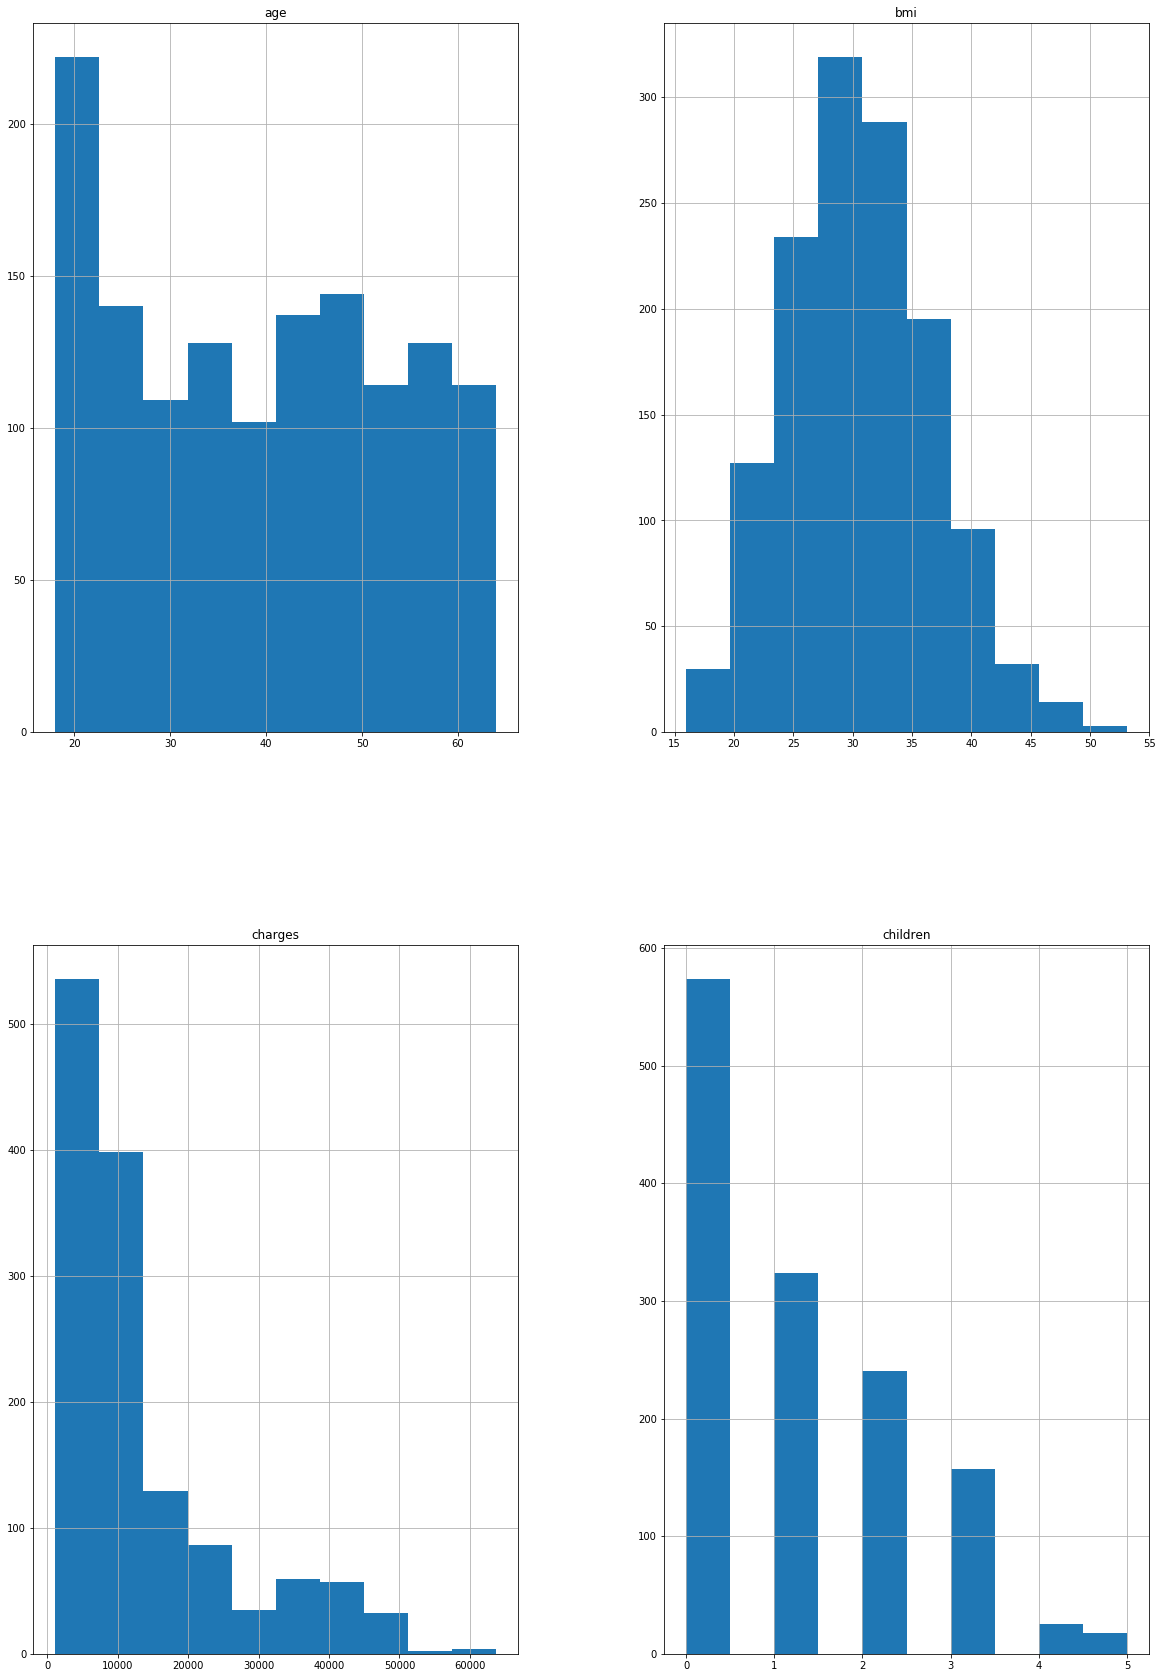

In [13]:
# Feature analysis

ins.hist(figsize=(20,30))

## Corelation Matrix in Head map 

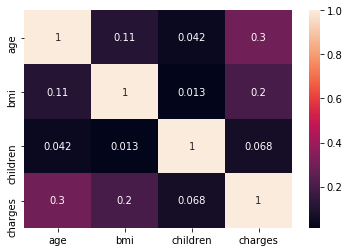

In [14]:
corr=ins.corr()
sns.heatmap(corr,annot=True)

## Calculating skewness 

In [15]:
from scipy.stats import skew
ins.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# outlier treatment using standard deviatiation

# Set upper and lower limit to 2 standard deviation

# Outlier treatent will done for two variables 'bmi' and 'Charges'

In [16]:
ins_std = np.std(ins['bmi'])
print(ins_std)
ins_mean = np.mean(ins['bmi'])
anomaly_cut_off = ins_std * 2

lower_limit  = ins_mean - anomaly_cut_off 
upper_limit = ins_mean + anomaly_cut_off   

print(lower_limit)
print(upper_limit)

6.095907641589428
18.471581577807683
42.85521214416539


In [17]:
ins.loc[ins.bmi > upper_limit, 'bmi'] = upper_limit

ins.loc[ins.bmi < lower_limit, 'bmi'] = lower_limit

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


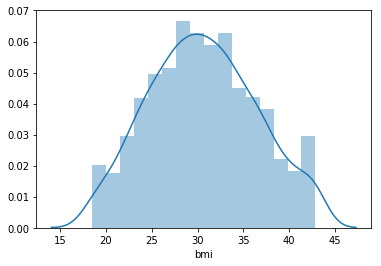

In [18]:
sns.distplot(ins['bmi'])

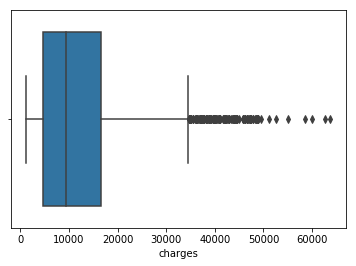

In [19]:
sns.boxplot('charges',data=ins)
plt.show()

### Now we will replace outliers with mean+-3* S.D for variable 'charges'

12105.484975561605
-23046.032661543562
49586.877191826075


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


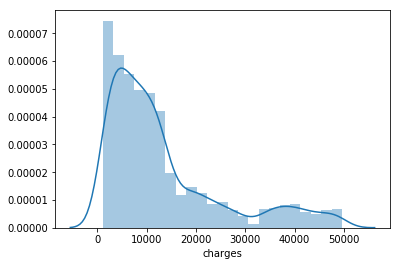

In [20]:

ins_std = np.std(ins['charges'])
print(ins_std)
ins_mean = np.mean(ins['charges'])
anomaly_cut_off = ins_std * 3

lower_limit  = ins_mean - anomaly_cut_off 
upper_limit = ins_mean + anomaly_cut_off   

print(lower_limit)
print(upper_limit)

ins[ins.charges>upper_limit]
ins[ins.charges<lower_limit]

ins.loc[ins.charges > upper_limit, 'charges'] = upper_limit
ins.loc[ins.charges < lower_limit, 'charges'] = lower_limit


ins[ins.charges>upper_limit]
ins[ins.charges<lower_limit]

sns.distplot(ins['charges'])

# there are no null values in insurance csv.


## Analyse categorical columns using box plot, Scatter plot 

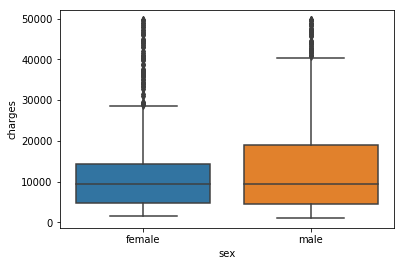

In [21]:
sns.boxplot(x='sex', y='charges',data= ins)

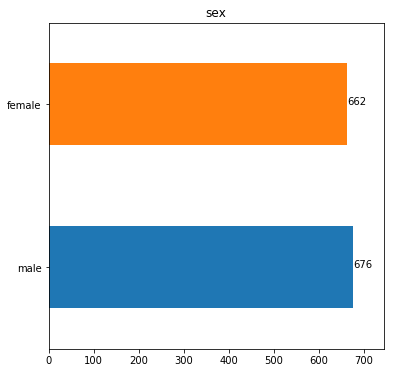

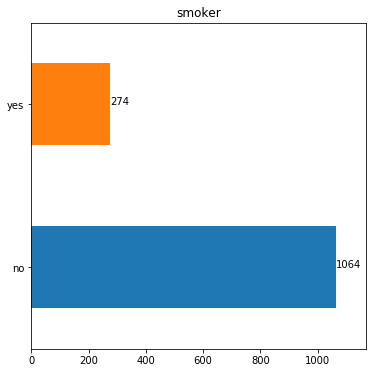

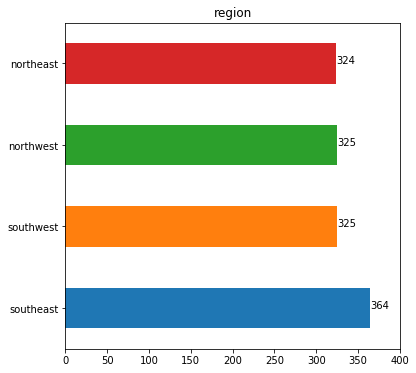

In [22]:
for column in categorical_features:
    f = ins[column].value_counts().plot(kind='barh', figsize=(6,6))
    
    #for plotting the value count
    for n,i in enumerate(ins[column].value_counts(dropna=False)):
        plt.annotate(i,xy=(i,n))
    
    #set the title
    plt.title(column)
    
    #ALignment
    plt.xlim(0,ins[column].value_counts(dropna=False).max()*1.1)
    plt.show()

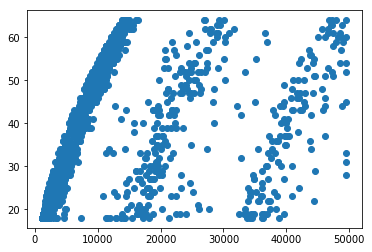

In [23]:
#Scatter Plots

plt.scatter('charges','age',data=ins)

## Pair Plot 

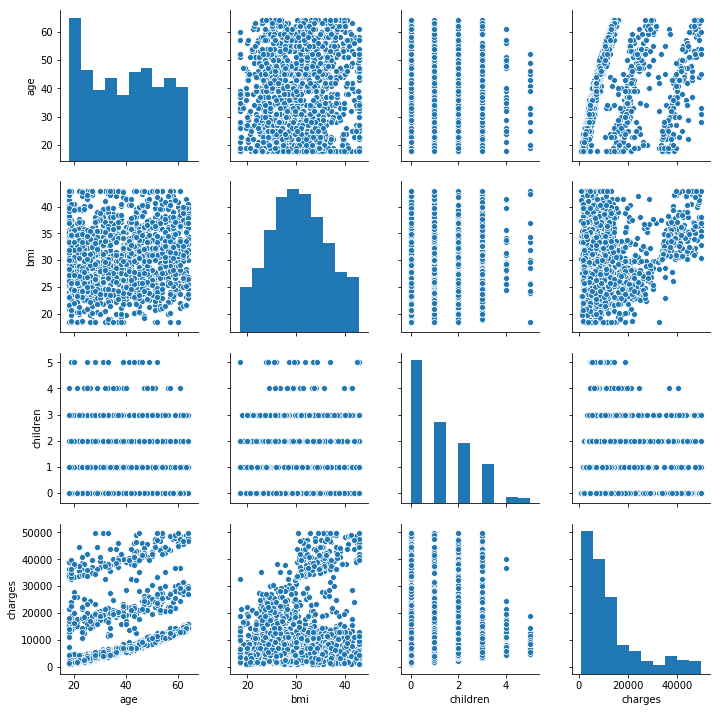

In [24]:
sns.pairplot(ins)

# As per pairplot diagram age and charges has strong relationship.

In [25]:
# Do charges of people who smoke differ significantly from the people who dont?

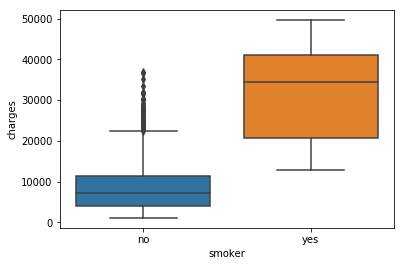

In [26]:
#First we will quickly create box plot-

sns.boxplot('smoker','charges',data=ins)

In [27]:
# Null hypothesis is that both Somkers and non somkers have same mean charges.
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

y= ins[ins.smoker=='yes'][['charges']]
z= ins[ins.smoker=='no'][['charges']]


In [28]:
Charges_smoker=y[['charges']]

Charges_nonsmoker=z[['charges']]


In [29]:
t_statistic, p_value = ttest_ind(Charges_smoker, Charges_nonsmoker)
print(t_statistic, p_value)

[47.08549138] [4.77240248e-286]


### Our null hypothesis is rejected because p value is less than Significance of error 0.05. 
#### So charges are significantly different for smoker and non smoker.

#### Does bmi of males differ significantly from that of females?


In [30]:
bmi_male= ins[ins.sex=='male'][['bmi']]

bmi_female= ins[ins.sex=='female'][['bmi']]


In [31]:
t_statistic,p_value=ttest_ind(bmi_male,bmi_female)
print(t_statistic, p_value)
a=.05 #Level of significance 
if p_value >a:
    print ("Null hypothesis is accepted")

else:
    print("we are failed to rejectc null hypothesisis")

[1.62208241] [0.10502165]
Null hypothesis is accepted


#### p values is higher than significance of error .05 so we are failed to reject Null hypothesis. There is no significant difference between BMI of Man and Woman.

# Is the proportion of smokers significantly different in different genders?

In [32]:
female_smokers = ins[ins['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = ins[ins['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = ins.sex.value_counts()[1] # number of females in the data
n_males = ins.sex.value_counts()[0]

In [33]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print('Null hypothesis is rejected')
else:
    print('We are failed to reject null hypothesis')

Null hypothesis is rejected


# Is the distribution of bmi across women with no children, one child and two children, the same?

In [34]:

mean_bmi_df = pd.DataFrame()

df1=ins[(ins.sex=='female') & (ins.children==0)][['children','bmi']]
df2=ins[(ins.sex=='female') & (ins.children==1)][['children','bmi']]
df3=ins[(ins.sex=='female') & (ins.children==2)][['children','bmi']]

mean_bmi_df = mean_bmi_df.append(df1) 
mean_bmi_df = mean_bmi_df.append(df2) 
mean_bmi_df = mean_bmi_df.append(df3) 




In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = mean_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children      1.165414    1.0  0.033649  0.854521
Residual  19533.660626  564.0       NaN       NaN


## p value 0.85452 is higher  than 0.05 so we accept the nul hypothesis.  Mean of all BMI for women with 0,1 and 2 children has no significant difference. so distribution is same.